[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/flame.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Flame propagation
# Define ODE dy/dt=y^2-y^3
delta = 0.0001 # initial condition
F = lambda t, y: y**2-y**3 
reltol = 1e-4

# # Solve ODE with RK45
sol = solve_ivp(F, [0, 4/delta], [delta], rtol=reltol)
# Unpack solution
t, y = sol.t, sol.y

In [3]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

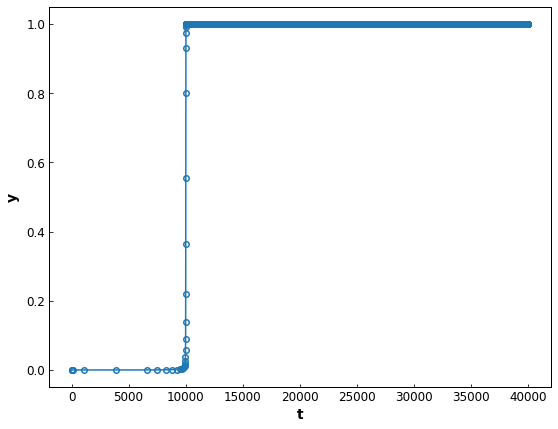

In [4]:
# Plot the final solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

plt.plot(t, y[0,:], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y$')

plt.show()

We can also use the custom written `ode45` in Python to integrate ODE.

In [5]:
from scipy.integrate import ode

In [6]:
# Creating a function equivalent to ode45 in Matlab
def ode45(f, tint, y0, rtol=1e-9):
    """Python implementation of MATLAB ode45

    Args:
        f (function): differential equation to solve
        tint (list): time interval endpoints
        y0 (list): initial condition
        rtol (float): relative tolerance

    Returns:
        tt (list): time intervel
        rr (list): array of solutions (theta, dtheta)
        
    """
    
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt = (tint[1]-tint[0])/10000 # note that here is 10000 instead of 100
    t1 = tint[1]
    tt = []
    rr = []
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
        
    return tt, rr

In [7]:
# Flame propagation
# Define ODE dy/dt=y^2-y^3
delta = 0.0001 # initial condition
F = lambda t, y: y**2-y**3 
reltol = 1e-4

# # Solve ODE with custom ode45
t, y = ode45(F, [0, 40000], delta)

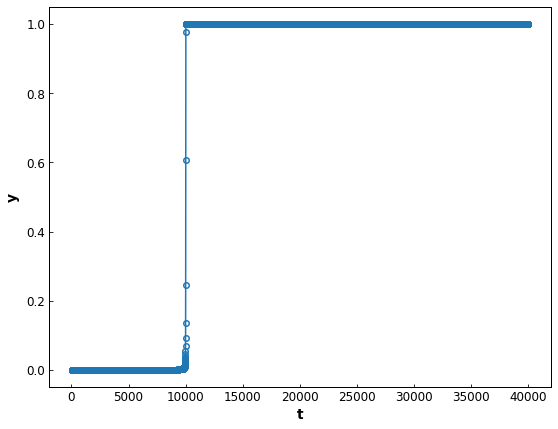

In [8]:
# Plot the final solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

plt.plot(t, y, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y$')

plt.show()